# Task I: Quantum Computing Part 

## 1. Implement a simple quantum operation with Cirq or Pennylane
<ol> 
    <li> With 5 qubits 
    <li> Apply Hadamard operation on every qubit 
    <li> Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
    <li> SWAP (0, 4) 
    <li> Rotate X with pi/2 on any qubit 
    <li> Plot the circuit 
</ol>
<hr>

## 2. Implement a second circuit with a framework of your choice:
<ol>
    <li> Apply a Hadmard gate to the first qubit
    <li> Rotate the second qubit by pi/3 around X
    <li> Apply Hadamard gate to the third and fourth qubit
    <li> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
</ol>
<hr>

# Task 1

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───
measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(0))
output vector: [0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12499999-0.12499999j 0.12499999-0.12499999j
 0.12499999-0.12499999j 0.12

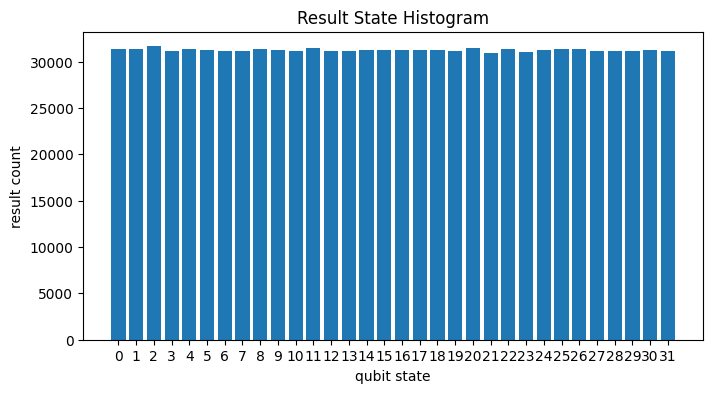

In [6]:
'''
    a-> With 5 qubits 
    b-> Apply Hadamard operation on every qubit 
    c-> Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
    d-> SWAP (0, 4) 
    e-> Rotate X with pi/2 on any qubit 
    f-> Plot the circuit 
'''

import cirq
import numpy as np
import matplotlib.pyplot as plt

''' Task a -> Create 5 qubits and add it to a circuit '''
''' Now they will be: 
    q0: 1|0⟩
    q1: 1|0⟩
    q2: 1|0⟩
    q3: 1|0⟩
    q4: 1|0⟩
'''
qubits = [cirq.LineQubit(i) for i in range(5)]
circuit_task01 = cirq.Circuit()
# print (circuit_task01)

''' Task b -> Apply Hadaman operations on every qubit '''
''' Now they will be: 
    q0: 1/√2 ( |0⟩ + |1⟩ )
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/√2 ( |0⟩ + |1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
'''
circuit_task01.append(cirq.H(q) for q in qubits)
# print (circuit_task01)

''' Task c -> Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) '''
circuit_task01.append(cirq.CNOT(qubits[i], qubits[i + 1]) for i in range(4))
''' Now they will be: 
    q0: 1/√2 ( |0⟩ + |1⟩ )
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/√2 ( |0⟩ + |1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
'''

''' Task d-> SWAP (0, 4) '''
circuit_task01.append(cirq.SWAP(qubits[0], qubits[4]))
''' Now they will be: 
    q0: 1/√2 ( |0⟩ + |1⟩ )
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/√2 ( |0⟩ + |1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
'''

''' Task e-> Rotate X with pi/2 on any qubit  '''
circuit_task01.append(cirq.rx(np.pi / 2)(qubits[2]))
''' Now they will be: 
    q0: 1/√2 ( |0⟩ + |1⟩ )
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/√2 ( |0⟩ - |1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
'''

''' Task f-> Plot the circuit ''' 
print (circuit_task01)

s = cirq.Simulator()
results = s.simulate(circuit_task01)
print (results)
circuit_task01.append(cirq.measure(cirq.LineQubit(4), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(0), key='result'))
samples = s.run(circuit_task01, repetitions=1000000)

# Plot the circuit
cirq.CircuitDiagramInfo(circuit_task01)
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

# Task 2

0: ───H────────────×───────────
                   │
1: ───Rx(0.333π)───┼───×───────
                   │   │
2: ───H────────────×───┼───────
                   │   │
3: ───H────────────┼───×───────
                   │   │
4: ───H────────────@───@───H───
measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(0), cirq.LineQubit(2), cirq.LineQubit(1), cirq.LineQubit(3))
output vector: [ 0.30618617+0.j          0.15309308-0.08838834j  0.15309308-0.08838834j
  0.        -0.17677668j  0.30618617+0.j          0.15309308-0.08838834j
  0.15309308-0.08838834j  0.        -0.17677668j  0.30618617+0.j
  0.15309308-0.08838834j  0.15309308-0.08838834j  0.        -0.17677668j
  0.30618617+0.j          0.15309308-0.08838834j  0.15309308-0.08838834j
  0.        -0.17677668j -0.        +0.j          0.15309308+0.08838834j
 -0.15309308-0.08838834j -0.        +0.j         -0.        +0.j
  0.15309308+0.08838834j -0.15309308-0.08838834j -0.        +0.j
 -0.        +0.j          0.1530

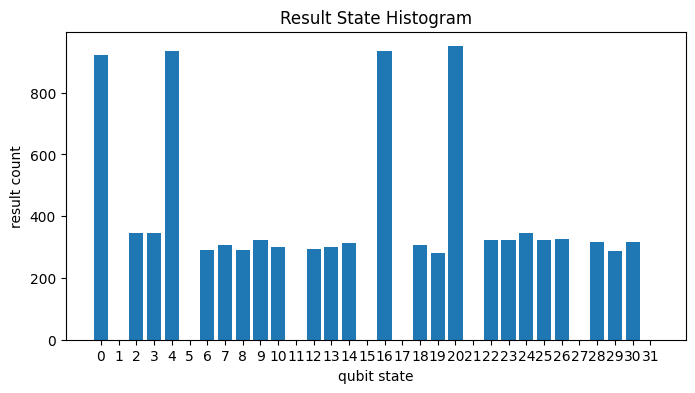

In [ ]:
'''
    a -> Apply a Hadmard gate to the first qubit
    b -> Rotate the second qubit by pi/3 around X
    c -> Apply Hadamard gate to the third and fourth qubit
    d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4> 
'''
import cirq
import numpy as np
import matplotlib.pyplot as plt


''' Now they will be: 
    q1: 1|0⟩
    q2: 1|0⟩
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''
q1, q2, q3, q4, ancilla = cirq.LineQubit.range(5)  # Extra qubit for swap test
circuit_task02 = cirq.Circuit()
# print (circuit_task02)

''' Task a -> Apply a Hadmard gate to the first qubit '''
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1|0⟩
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''
circuit_task02.append(cirq.H(q1))
# print (circuit_task02)

''' Task b -> Rotate the second qubit by pi/3 around X '''
circuit_task02.append(cirq.rx(np.pi / 3)(q2))
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''

''' Task c -> Apply Hadamard gate to the third and fourth qubit '''
circuit_task02.append(cirq.H(q3))
circuit_task02.append(cirq.H(q4))
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
    ancilla: 1|0⟩
'''

''' Task d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4> '''
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
    ancilla: 1|0⟩
'''
# We shall use controlled swap gate, with 
circuit_task02.append(cirq.H(ancilla))
circuit_task02.append(cirq.CSWAP(ancilla, q1, q3))
circuit_task02.append(cirq.CSWAP(ancilla, q2, q4))
circuit_task02.append(cirq.H(ancilla))

print (circuit_task02)

s = cirq.Simulator()
results = s.simulate(circuit_task02)
print (results)
circuit_task02.append(cirq.measure(q1, q2, q3, q4, ancilla, key='result'))
samples = s.run(circuit_task02, repetitions=10000)

# Plot the circuit
cirq.CircuitDiagramInfo(circuit_task02)
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()


0: ───H────────────×───────────
                   │
1: ───Rx(0.333π)───┼───×───────
                   │   │
2: ───H────────────×───┼───────
                   │   │
3: ───H────────────┼───×───────
                   │   │
4: ───H────────────@───@───H───
measurements: (no measurements)

qubits: (cirq.LineQubit(4), cirq.LineQubit(0), cirq.LineQubit(2), cirq.LineQubit(1), cirq.LineQubit(3))
output vector: [ 0.30618617+0.j          0.15309308-0.08838834j  0.15309308-0.08838834j
  0.        -0.17677668j  0.30618617+0.j          0.15309308-0.08838834j
  0.15309308-0.08838834j  0.        -0.17677668j  0.30618617+0.j
  0.15309308-0.08838834j  0.15309308-0.08838834j  0.        -0.17677668j
  0.30618617+0.j          0.15309308-0.08838834j  0.15309308-0.08838834j
  0.        -0.17677668j -0.        +0.j          0.15309308+0.08838834j
 -0.15309308-0.08838834j -0.        +0.j         -0.        +0.j
  0.15309308+0.08838834j -0.15309308-0.08838834j -0.        +0.j
 -0.        +0.j          0.1530

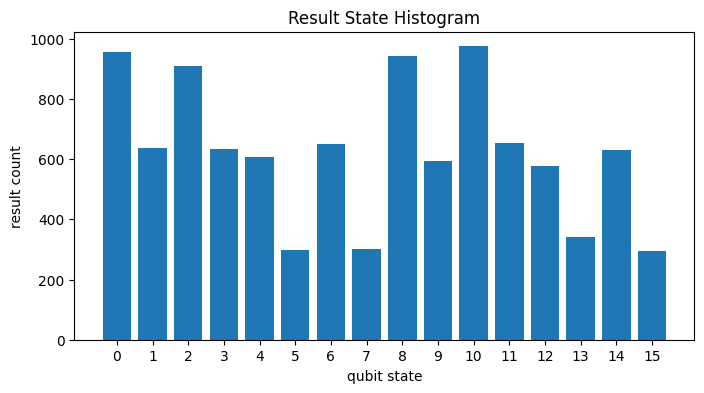

In [ ]:
# Just the first 4 qubits
'''
    a -> Apply a Hadmard gate to the first qubit
    b -> Rotate the second qubit by pi/3 around X
    c -> Apply Hadamard gate to the third and fourth qubit
    d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4> 
'''
import cirq
import numpy as np
import matplotlib.pyplot as plt


''' Now they will be: 
    q1: 1|0⟩
    q2: 1|0⟩
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''
q1, q2, q3, q4, ancilla = cirq.LineQubit.range(5)  # Extra qubit for swap test
circuit_task02 = cirq.Circuit()
# print (circuit_task02)

''' Task a -> Apply a Hadmard gate to the first qubit '''
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1|0⟩
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''
circuit_task02.append(cirq.H(q1))
# print (circuit_task02)

''' Task b -> Rotate the second qubit by pi/3 around X '''
circuit_task02.append(cirq.rx(np.pi / 3)(q2))
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1|0⟩
    q4: 1|0⟩
    ancilla: 1|0⟩
'''

''' Task c -> Apply Hadamard gate to the third and fourth qubit '''
circuit_task02.append(cirq.H(q3))
circuit_task02.append(cirq.H(q4))
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
    ancilla: 1|0⟩
'''

''' Task d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4> '''
''' Now they will be: 
    q1: 1/√2 ( |0⟩ + |1⟩ )
    q2: 1/2 ( √3|0⟩ -i|1⟩ )
    q3: 1/√2 ( |0⟩ + |1⟩ )
    q4: 1/√2 ( |0⟩ + |1⟩ )
    ancilla: 1|0⟩
'''
# We shall use controlled swap gate, with 
circuit_task02.append(cirq.H(ancilla))
circuit_task02.append(cirq.CSWAP(ancilla, q1, q3))
circuit_task02.append(cirq.CSWAP(ancilla, q2, q4))
circuit_task02.append(cirq.H(ancilla))

print (circuit_task02)

s = cirq.Simulator()
results = s.simulate(circuit_task02)
print (results)
circuit_task02.append(cirq.measure(q1, q2, q3, q4, key='result'))
samples = s.run(circuit_task02, repetitions=10000)

# Plot the circuit
cirq.CircuitDiagramInfo(circuit_task02)
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()


# Understanding Discrepencies

## Ancilla gate: Task 2

0: ───H────────────×───────────────────────────────────
                   │
1: ───Rx(0.333π)───┼───×───────────────────────────────
                   │   │
2: ───H────────────×───┼───────────────────────────────
                   │   │
3: ───H────────────┼───×───────────────────────────────
                   │   │
4: ───H────────────@───@───H───M('swap_test_result')───
measurements: swap_test_result=0

qubits: (cirq.LineQubit(0), cirq.LineQubit(2), cirq.LineQubit(1), cirq.LineQubit(3))
output vector: [0.3535534+0.j         0.1767767-0.10206208j 0.1767767-0.10206208j
 0.       -0.20412417j 0.3535534+0.j         0.1767767-0.10206208j
 0.1767767-0.10206208j 0.       -0.20412417j 0.3535534+0.j
 0.1767767-0.10206208j 0.1767767-0.10206208j 0.       -0.20412417j
 0.3535534+0.j         0.1767767-0.10206208j 0.1767767-0.10206208j
 0.       -0.20412417j]

qubits: (cirq.LineQubit(4),)
output vector: |0⟩

phase:
output vector: |⟩


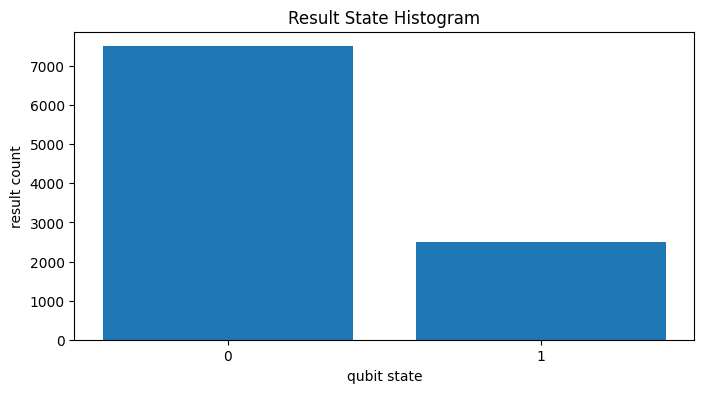

In [ ]:
''' Testing ancilla gate outputs '''
'''
Ideally it should be 0, but here we see that, around 25% of the times it is 1
This may be due to the fact that, q1 and q2 aren't identical states
let's test this hypotheses in the next segment of code:
'''


import cirq
import numpy as np
import matplotlib.pyplot as plt

# Define qubits
q1, q2, q3, q4, ancilla = cirq.LineQubit.range(5)  # Extra qubit for swap test
circuit = cirq.Circuit()

# Task a -> Apply a Hadamard gate to the first qubit
circuit.append(cirq.H(q1))

# Task b -> Rotate the second qubit by pi/3 around X
circuit.append(cirq.rx(np.pi / 3)(q2))

# Task c -> Apply Hadamard gate to the third and fourth qubit
circuit.append([cirq.H(q3), cirq.H(q4)])

# Task d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
circuit.append(cirq.H(ancilla))
circuit.append(cirq.CSWAP(ancilla, q1, q3))
circuit.append(cirq.CSWAP(ancilla, q2, q4))
circuit.append(cirq.H(ancilla))

# Measure the ancilla qubit
circuit.append(cirq.measure(ancilla, key='swap_test_result'))

# Print the circuit
print(circuit)

# Simulate the circuit
s = cirq.Simulator()
results = s.simulate(circuit)
print(results)

# Run the circuit multiple times and collect measurement statistics
samples = s.run(circuit, repetitions=10000)

# Plot the result
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, ax)
plt.show()


0: ───H───×───────────────────────────────────
          │
1: ───H───┼───×───────────────────────────────
          │   │
2: ───H───×───┼───────────────────────────────
          │   │
3: ───H───┼───×───────────────────────────────
          │   │
4: ───H───@───@───H───M('swap_test_result')───
measurements: swap_test_result=0

qubits: (cirq.LineQubit(0), cirq.LineQubit(2), cirq.LineQubit(1), cirq.LineQubit(3))
output vector: [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]

qubits: (cirq.LineQubit(4),)
output vector: |0⟩

phase:
output vector: |⟩


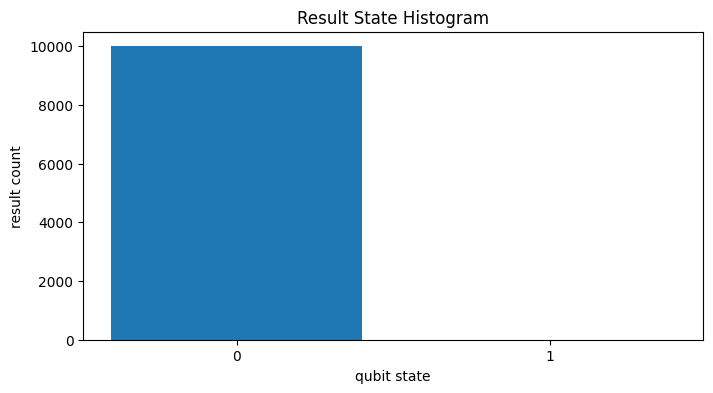

In [ ]:
''' Testing ancilla gate outputs '''
'''
Ideally it should be 0, but here we see that, around 25% of the times it is 1
This may be due to the fact that, q1 and q2 aren't identical states
let's test this hypotheses in this segment of code:making the 2 gates identical

The Graph supports the claim that one of the reasons that ancilla isn't returning to 
0 is due to the non-identical q1 and q2 states
'''


import cirq
import numpy as np
import matplotlib.pyplot as plt

# Define qubits
q1, q2, q3, q4, ancilla = cirq.LineQubit.range(5)  # Extra qubit for swap test
circuit = cirq.Circuit()

# Task a -> Apply a Hadamard gate to the first qubit
circuit.append(cirq.H(q1))

# Task b -> Rotate the second qubit by pi/3 around X
# circuit.append(cirq.rx(np.pi / 3)(q2))
circuit.append(cirq.H(q2))


# Task c -> Apply Hadamard gate to the third and fourth qubit
circuit.append([cirq.H(q3), cirq.H(q4)])

# Task d -> Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
circuit.append(cirq.H(ancilla))
circuit.append(cirq.CSWAP(ancilla, q1, q3))
circuit.append(cirq.CSWAP(ancilla, q2, q4))
circuit.append(cirq.H(ancilla))

# Measure the ancilla qubit
circuit.append(cirq.measure(ancilla, key='swap_test_result'))

# Print the circuit
print(circuit)

# Simulate the circuit
s = cirq.Simulator()
results = s.simulate(circuit)
print(results)

# Run the circuit multiple times and collect measurement statistics
samples = s.run(circuit, repetitions=10000)

# Plot the result
fig, ax = plt.subplots(figsize=(8, 4))
cirq.plot_state_histogram(samples, ax)
plt.show()
